# Tf-idf

In [4]:
import re
import pathlib
import numpy as np

In [5]:
pathfile = r'E:\STUDY\8PM9I\UIRS'
dataset_file = pathlib.Path(pathfile).joinpath('temp')

In [6]:
class Patient:
    """
    In treatment_days every day is an element.
    vectorizer is TfidfVectorizer
    tfidf_scores contains dict of bags of words(bows) for every day
    keybows conatins the highest num_keybows tfidf_scores 
    """
    num_keybows = 5
    
    def __init__(self):
        self.treatment_days = []
        self.vectorizer = None
        self.tfidf_scores = []
        self.keybows = []
    def __len__(self):
        return len(self.treatment_days)

In [7]:
docs = (file for file in dataset_file.iterdir() if file.suffix == '.txt')

date_pattern = re.compile(r'\d\d[.]\d\d[.]\d\d\d\d(.)')

patients = []
for patientfile in docs:
    with open(patientfile, 'rt') as pf: 
        patient = Patient()
        for i, day in enumerate(pf):
            day = re.sub(date_pattern, '', day)
            day = re.sub('\n', '', day)
            day = re.sub(r'[0-9]+', '', day)
            patient.treatment_days.append(day)
    patients.append(patient)
patients

In [8]:
"""Заполнить незаолненные дни предыдущим днем (считаем, что состояние пациента не изменилось)"""
for patient in patients:
    for i, day in enumerate(patient.treatment_days):
        if day in [' ', '']:
            patient.treatment_days[i] = patient.treatment_days[i-1]
    
#patients[0].treatment_days

In [9]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

for patient in patients:
    for i, day in enumerate(patient.treatment_days):
        words = day.split()
        for word in words:    
            p = morph.parse(word.strip(':,-'))[0]
            day = day.replace(word.strip(':,-'), p.normal_form)
        patient.treatment_days[i] = day
patients[0].treatment_days

['жалоба: на распирать боль, жжение, зуд в область левый голень, общий недомогание, слабость, разбитость, повышение температура до ,. локальный статус: на левый голень эритема с множество геморрагия, граница, чёткий, горячий на ощупь, отечь мягкий ткань умеренно выразить, тестовата консистенция, болезненность по периферия преобладает.',
 'жалоба: на умеренный боль ',
 'жалоба: чувствовать себя хороший, температура нормальный, местный явление начать регрессировать, маленький отечь и гиперемия. локальный статус: на левый голень эритема, болезненность незначительная. паховый лимфатический узел слева слегка слегка болезненны.',
 'локальный статус: паховый лимфатический узел слева слегка безболезненны.',
 'жалоба: местный явление существенно меньше. локальный статус: на левый голень эритема стать значительно бледнее.',
 'жалоба: местный явление существенно меньше. локальный статус: на левый голень эритема стать значительно бледнее.',
 'локальный статус: на голень бледнеть гиперемия, отцвета

In [10]:
from nltk.corpus import stopwords


additional_stop_words = ['дата','время','осмотра','номер','пациента', 'локальный','статус','осмотр']
russian_stopwords = stopwords.words("russian")
russian_stopwords += additional_stop_words
#print(russian_stopwords)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


for patient in patients:
    if patient.vectorizer is None:
        vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(1, 3))
        matrix = vectorizer.fit_transform(patient.treatment_days)
        feature_names = vectorizer.get_feature_names()
        patient.vectorizer = vectorizer
        
        for iday in range(len(patient.treatment_days)):
            feature_index = matrix[iday,:].nonzero()[1]
            scores = zip(feature_index, [matrix[iday,x] for x in feature_index])
            tfidf = {}
            for word, value in [(feature_names[i], value) for (i, value) in scores]:
                tfidf[word] = value
            patient.tfidf_scores.append(tfidf)
        
    
    
len(patients[0].tfidf_scores)

12

In [14]:
#bow - bag of words
num_keybows = Patient.num_keybows

for patient in patients:
    for iday in range(len(patient.treatment_days)):
        bows = patient.tfidf_scores[iday]
        sorted_ = sorted(bows, key=bows.get, reverse=True)[:num_keybows]
        tfidf = {}
        for keybow in sorted_:
            tfidf[keybow] = patient.tfidf_scores[iday][keybow]
        patient.keybows.append(tfidf)
    
patients[1].keybows[0]

{'повышение': 0.24447613932702925,
 'температура': 0.24447613932702925,
 'слабость': 0.24447613932702925,
 'головной': 0.24447613932702925,
 'разбитость': 0.24447613932702925}

In [253]:
# import pandas as pd
# """Pandas dataframe"""

# df = pd.DataFrame(data=dataset[0].toarray())
# df.columns = vectorizers[0].get_feature_names()
# df.head()

c:\users\roman\appdata\local\programs\python\python36\lib\site-packages\sklearn\decomposition\pca.py:445: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
W1206 22:18:56.748055  8020 legend.py:1289] No handles with labels found to put in legend.


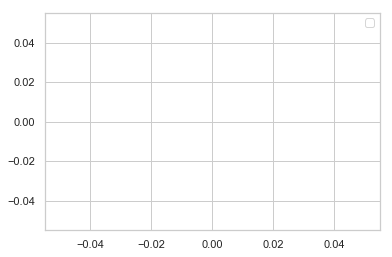

In [142]:
"""PCA in sklearn"""
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(df.head(1))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# plt.bar(range(1,df.shape[0]+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
# plt.step(range(1,df.shape[0]+1), cum_var_exp, where='mid', label='кумулятивая объясненная дисперсия')
# plt.ylabel('доля объясненной дисперсии')
# plt.xlabel('главные компоненты')

plt.bar(10, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.legend(loc='best')
plt.show()

12

In [ ]:
for da

(12, 10)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X  = df.iloc[:,:].values
X.shape

(11, 105)

numpy.ndarray

In [13]:
cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#eigen_vals

c:\users\roman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
c:\users\roman\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


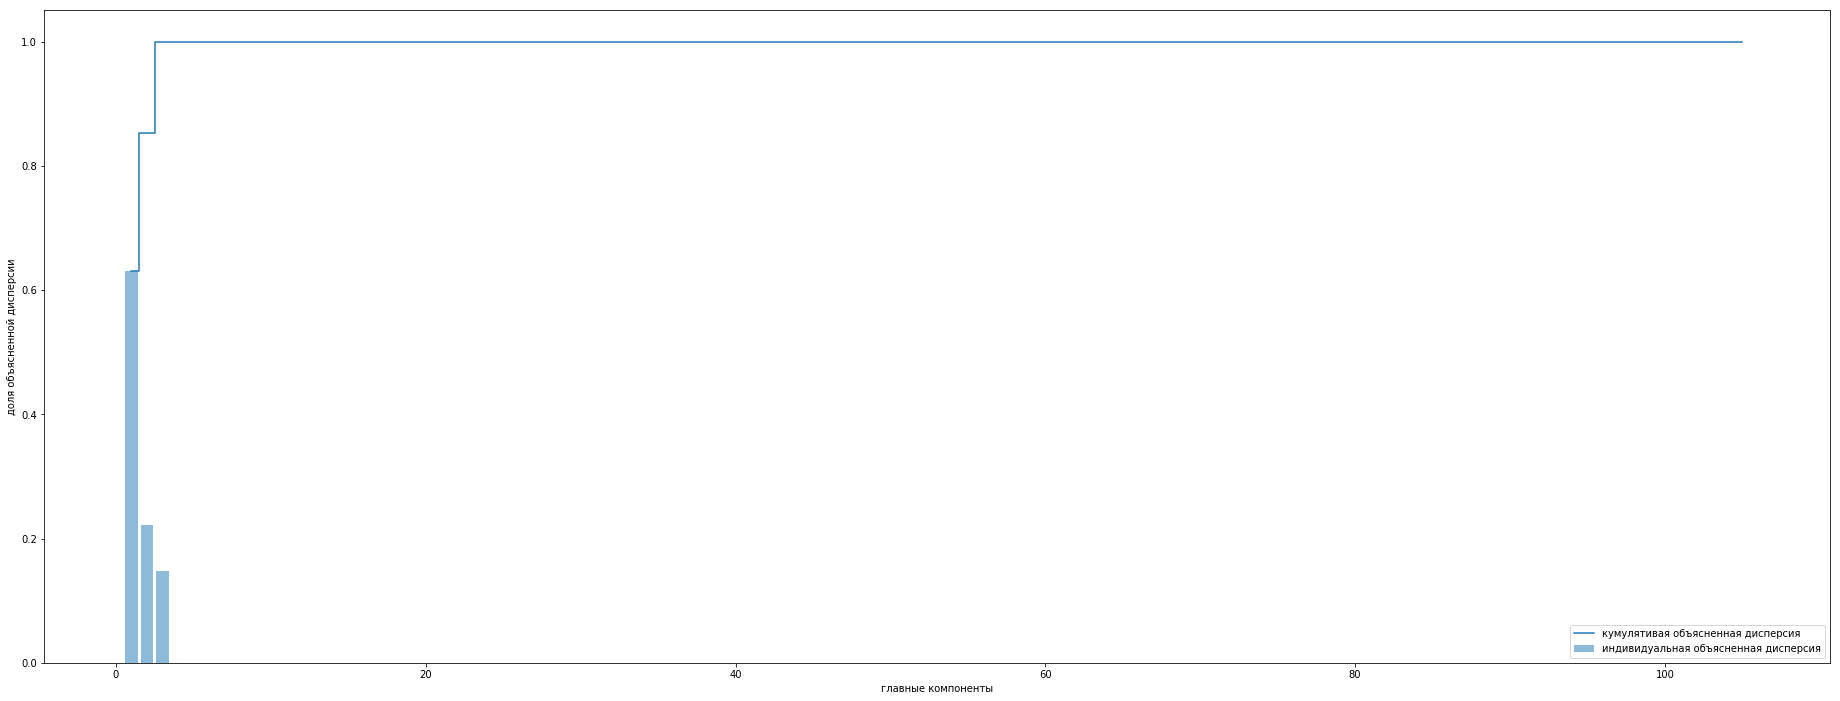

In [16]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(32,12))
plt.bar(range(1,X.shape[1]+1), var_exp, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
plt.step(range(1,X.shape[1]+1), cum_var_exp, where='mid', label='кумулятивая объясненная дисперсия')
plt.ylabel('доля объясненной дисперсии')
plt.xlabel('главные компоненты')
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
cum_var_exp 

array([0.63018547, 0.85209853, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [18]:

# plt.bar(range(0,X.shape[0]), pca.explained_variance_ratio_, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
# plt.step(range(0,X.shape[1]), cum_var_exp, where='mid', label='кумулятивая объясненная дисперсия')
# plt.ylabel('доля объясненной дисперсии')
# plt.xlabel('главные компоненты')
# plt.legend(loc='best')
# plt.show()

бисакод
бисакодила диурез
бисакодила диурез патолог
бол
боли слаб
боли слабость стул
волосист
волосистой част
волосистой части голов
выздоровлен
выписыва


IndexError: index 11 is out of bounds for axis 0 with size 11

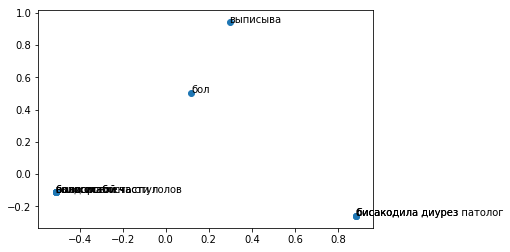

In [19]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(feature_names):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    print(word)
plt.show()

IPython             botocore            jupyter             scipy
PIL                 builtins            jupyter_client      secrets
__future__          bz2                 jupyter_console     select
_ast                cProfile            jupyter_core        selectors
_asyncio            calendar            keras               send2trash
_bisect             catalogue           keras_applications  setuptools
_blake2             certifi             keras_preprocessing shelve
_bootlocale         cgi                 keyword             shlex
_bz2                cgitb               kiwisolver          shutil
_codecs             chardet             lib2to3             signal
_codecs_cn          chunk               linecache           site
_codecs_hk          click               locale              six
_codecs_iso2022     cmath               logging             skcuda
_codecs_jp          cmd                 lzma                sklearn
_codecs_kr          code                macpath         

c:\users\roman\appdata\local\programs\python\python36\lib\pkgutil.py:107: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)
